In [163]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [170]:
df = pd.read_csv("C:\\Users\\Delta\\Downloads\\ToyotaCorolla.csv - ToyotaCorolla.csv.csv")
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [171]:
 df.shape

(1436, 37)

In [9]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [13]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [19]:
df1 = df.drop(columns=['Id', 'Model', 'Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Automatic', 'Cylinders',
       'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'])

df1.head()
#("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


<AxesSubplot:>

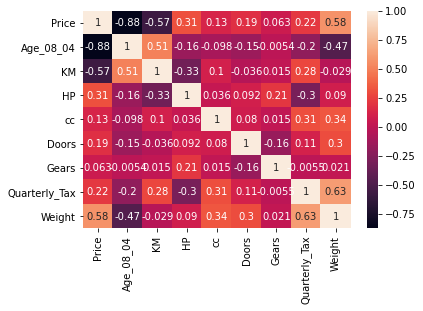

In [20]:
sns.heatmap(df1.corr(), annot=True)

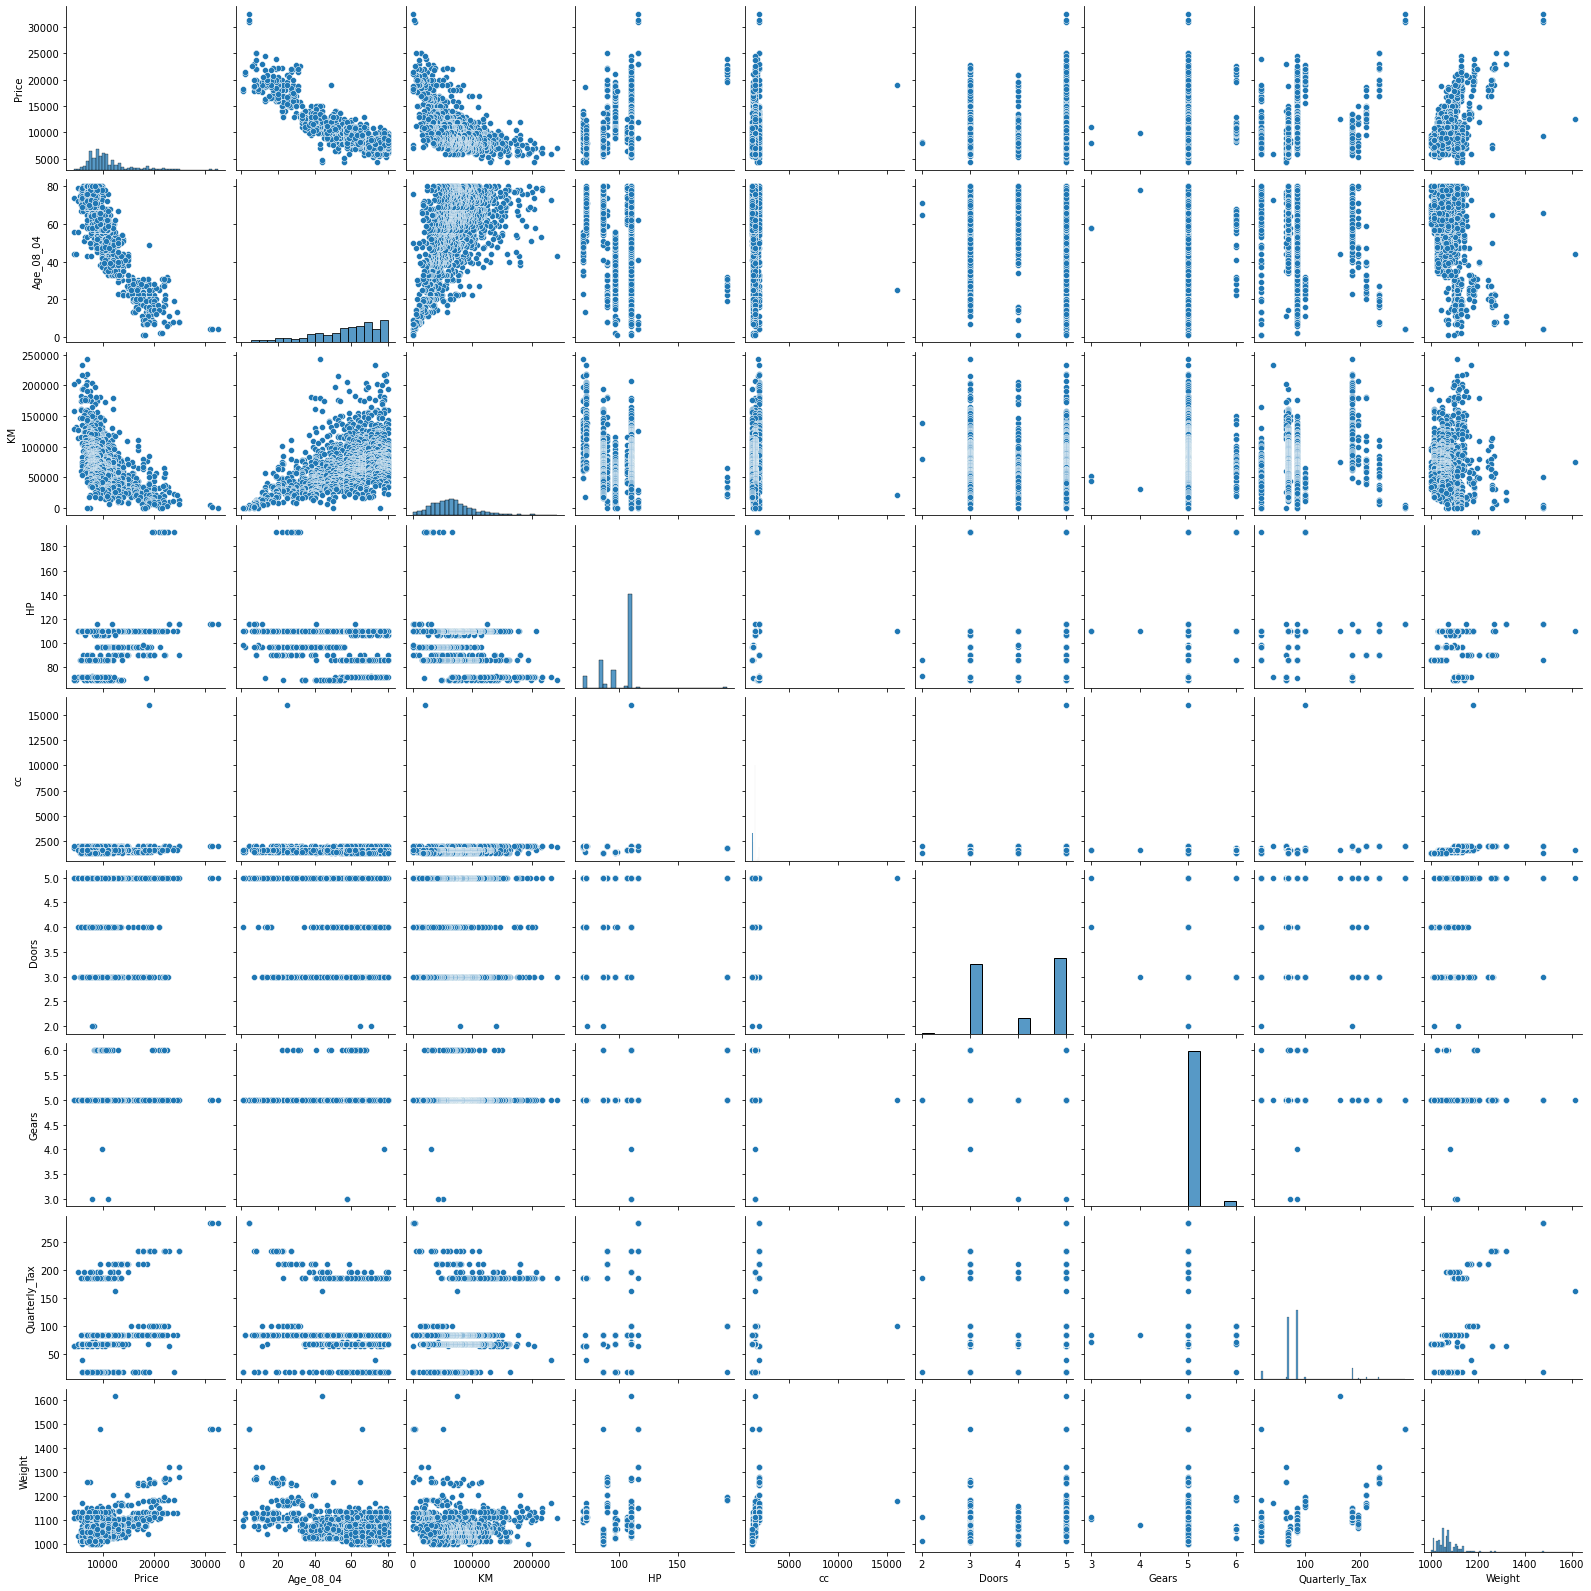

In [22]:
sns.pairplot(df1)

In [25]:
x = df1.drop(columns = ['Price'])
y = df1['Price']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

# Linear Regression

In [137]:
linReg = LinearRegression()
linReg.fit(xtrain, ytrain)

LinearRegression()

In [138]:
ypred1 = linReg.predict(xtest)

In [139]:
linRegR2Sco = r2_score(ytest, ypred1)
linRegR2Sco

0.8428460639851015

In [140]:
linRegRmse = (np.sqrt(mean_squared_error(ytest, ypred1)))
linRegRmse

1257.802698058551

# Polynomial Regression

In [141]:
polReg = PolynomialFeatures(degree = 2)
xPolTr = polReg.fit_transform(xtrain)
xPolTe = polReg.fit_transform(xtest)
polReg.fit(xPolTr, ytrain)
polReg1 = LinearRegression()
polReg1.fit(xPolTr, ytrain)

LinearRegression()

In [142]:
ypred2 = polReg1.predict(xPolTe)

In [143]:
polRegR2Sco = r2_score(ytest, ypred2)
polRegR2Sco

0.761023923049304

In [144]:
polRegRmse = (np.sqrt(mean_squared_error(ytest, ypred2)))
polRegRmse

1551.054665420415

# Ridge Regression

In [145]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [146]:
ridge = Ridge(alpha=0.5)
ridge.fit(xPolTr, ytrain)

C:\Users\Delta\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.85165e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.5)

In [147]:
ypred3 = ridge.predict(xPolTe)

In [148]:
ridgeR2Sco = r2_score(ytest, ypred3)
ridgeR2Sco

0.7813421826682737

In [149]:
ridgeRmse = (np.sqrt(mean_squared_error(ytest, ypred3)))
ridgeRmse

1483.653190895513

# Lasso Regression

In [150]:
lasso = Lasso(alpha=0.1)
lasso.fit(xPolTr, ytrain)

C:\Users\Delta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680523224.3586613, tolerance: 1597173.543490157
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [151]:
ypred4 = lasso.predict(xPolTe)


In [152]:
lassoR2Sco = r2_score(ytest, ypred4)
lassoR2Sco

0.8885533021685224

In [153]:
lassoRmse = (np.sqrt(mean_squared_error(ytest, ypred4)))
lassoRmse


1059.2134651963893

# SV Regressor

In [285]:

#xxx = StandardScaler()
#xtr = xxx.fit_transform(x)

#yyy = StandardScaler()
#ytr = yyy.fit_transform(df1[['Price']])
svR = SVR(kernel = 'rbf')
svR.fit(xtrain, ytrain)
ypred5 = svR.predict(xtest)
svR2Sco = r2_score(ytest, ypred5)
svR2Sco

-0.024779238186479313

In [286]:
svRmse = (np.sqrt(mean_squared_error(ytest, ypred5)))
svRmse

3211.9224408392906

# Decision Tree Regression

In [229]:
dtR = DecisionTreeRegressor()
dtR.fit(xtrain, ytrain)
ypred6 = dtR.predict(xtest)

In [230]:
dtR2Sco = r2_score(ytest, ypred6)
dtR2Sco

0.7956699157617964

In [231]:
dtRmse = (np.sqrt(mean_squared_error(ytest, ypred6)))
dtRmse

1434.220902518933

# Gradient Boosting Regressor

In [233]:
gbR = GradientBoostingRegressor(n_estimators=40)
gbR.fit(xtrain, ytrain)
ypred7 = gbR.predict(xtest)


In [234]:
gbR2Sco = r2_score(ytest, ypred7)
gbR2Sco

0.9036021122541569

In [235]:
gbRmse = (np.sqrt(mean_squared_error(ytest, ypred7)))
gbRmse

985.1075545054903

# Ada Boost Regressor

In [236]:
abR = AdaBoostRegressor(n_estimators=100)
abR.fit(xtrain, ytrain)
ypred8 = abR.predict(xtest) 

In [237]:
abR2Sco = r2_score(ytest, ypred8)
abR2Sco

0.8287068763463523

In [238]:
abRmse = (np.sqrt(mean_squared_error(ytest, ypred8)))
abRmse

1313.1666821230515

# Random Forest Regressor

In [239]:
rfR = RandomForestRegressor(n_estimators = 20)
rfR.fit(xtrain, ytrain)
ypred9 = rfR.predict(xtest)

In [240]:
rfR2Sco = r2_score(ytest, ypred9)
rfR2Sco

0.8862732350287832

In [241]:
rfRmse = (np.sqrt(mean_squared_error(ytest, ypred9)))
rfRmse

1069.9937315537115

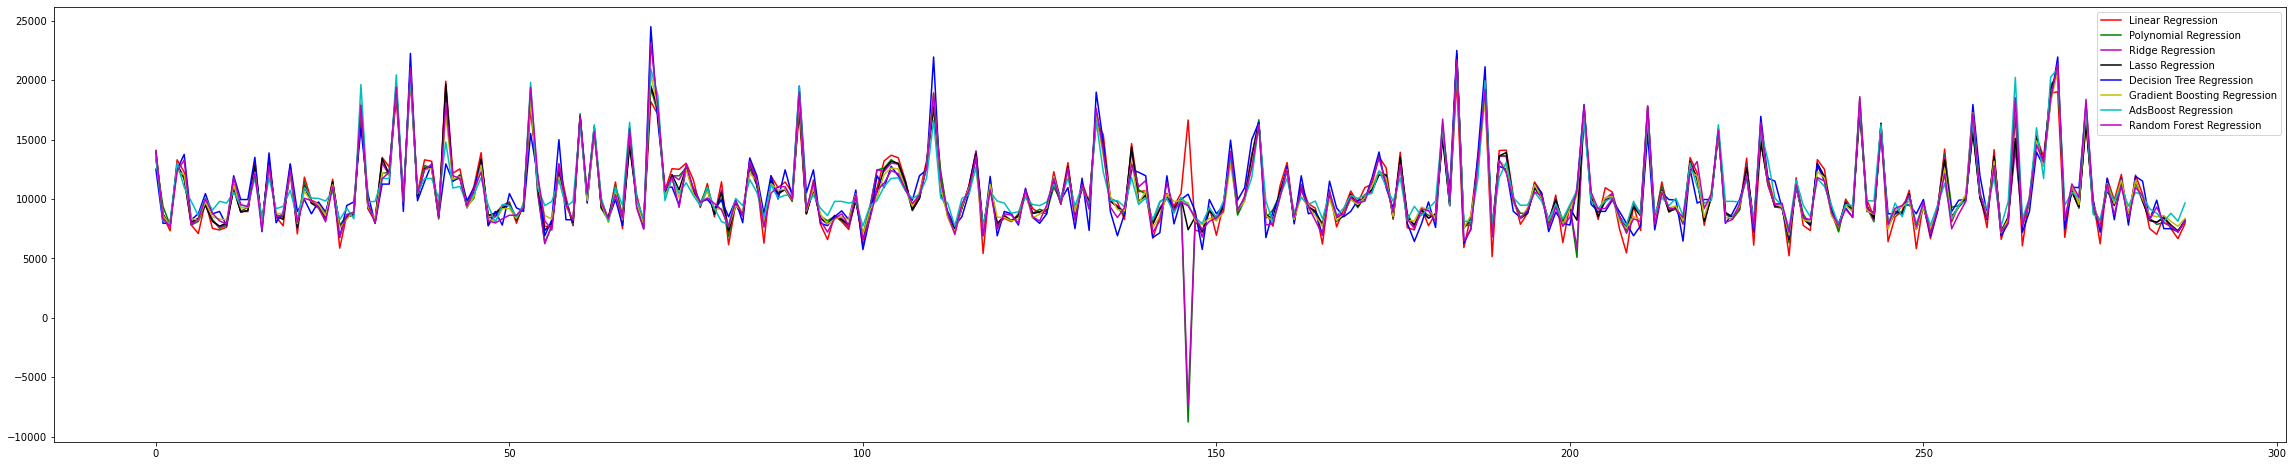

In [249]:
plt.figure(figsize=(40, 8))
plt.plot(ypred1, color='r',label="Linear Regression")
plt.plot(ypred2, color='g',label="Polynomial Regression")
plt.plot(ypred3, color='m',label="Ridge Regression")
plt.plot(ypred4, color='k',label="Lasso Regression")
#plt.plot(ypred5, color='k',label="S V Regression")
#svm model ypred5 is not correct
plt.plot(ypred6, color='b',label="Decision Tree Regression")
plt.plot(ypred7, color='y',label="Gradient Boosting Regression")
plt.plot(ypred8, color='c',label="AdsBoost Regression")
plt.plot(ypred9, color='m',label="Random Forest Regression")
plt.legend()

In [255]:
models = ["Linear Regression","Polynomial Regression","Ridge Regression","Lasso Regression","S V Regression","Decision Tree Regression","Gradient Boosting Regression","AdsBoost Regression","Random Forest Regression"]

In [268]:
r2scores= [0.84, 0.76, 0.78, 0.88, 0.00, 0.79, 0.90, 0.82, 0.88]
rmse =[1257.80,1551.05, 1483.65, 1059.21, 0.00,1434.22, 985.10, 1313.16, 1069.99]

In [277]:
df2 = pd.DataFrame()
df2["models"] = models
df2["r2scores"] = r2scores
df2['rmse'] = rmse

In [278]:
df2

,models,r2scores,rmse
0,Linear Regression,0.84,1257.80
1,Polynomial Regression,0.76,1551.05
2,Ridge Regression,0.78,1483.65
3,Lasso Regression,0.88,1059.21
4,S V Regression,0.00,0.00
5,Decision Tree Regression,0.79,1434.22
6,Gradient Boosting Regression,0.90,985.10
7,AdsBoost Regression,0.82,1313.16
8,Random Forest Regression,0.88,1069.99
